In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [ ]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

**[확률적 경사 하강법]**<p>
[참고 자료](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)<p>
경사 하강법-함수의 최솟값을 구하고자 할 때 쓰는 알고리즘 (손실 함수)<p>
과정:
1. 랜덤하게 시작 지점 설정
2. 한 지점에서의 기울기 구하기
3. 기울기 값에 따라 지점 이동 (기울기가 2였을 경우, -2*learning rate만큼 이동하는 식)
4. 최대 반복 횟수에 도달하거나 지점 위치에 변동이 거의 없으면 멈춤

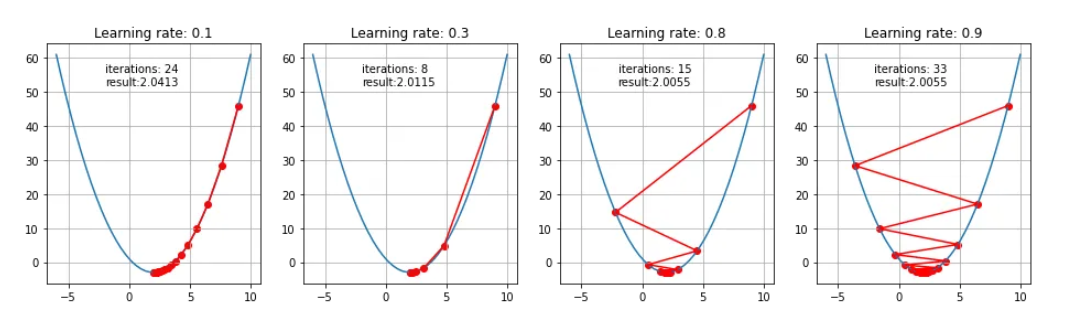

확률적 경사 하강법<p>
[참고 자료](https://mangkyu.tistory.com/62)<p>
데이터를 랜덤으로 선택하여 함수의 최솟값으로 다가감<p>
전체 데이터로 경사 하강법을 하는 것보다 훨씬 빠름<p>
1개가 아닌 여러 개의 데이터를 선택하는 **미니배치 경사 하강법**도 있음<p>
과정
1. 1개의 샘플을 선택해서 경사 하강법 수행
2. 모든 샘플을 사용할 때까지 반복
3. 다 썼으면 처음부터 다시 (+1 에포크)


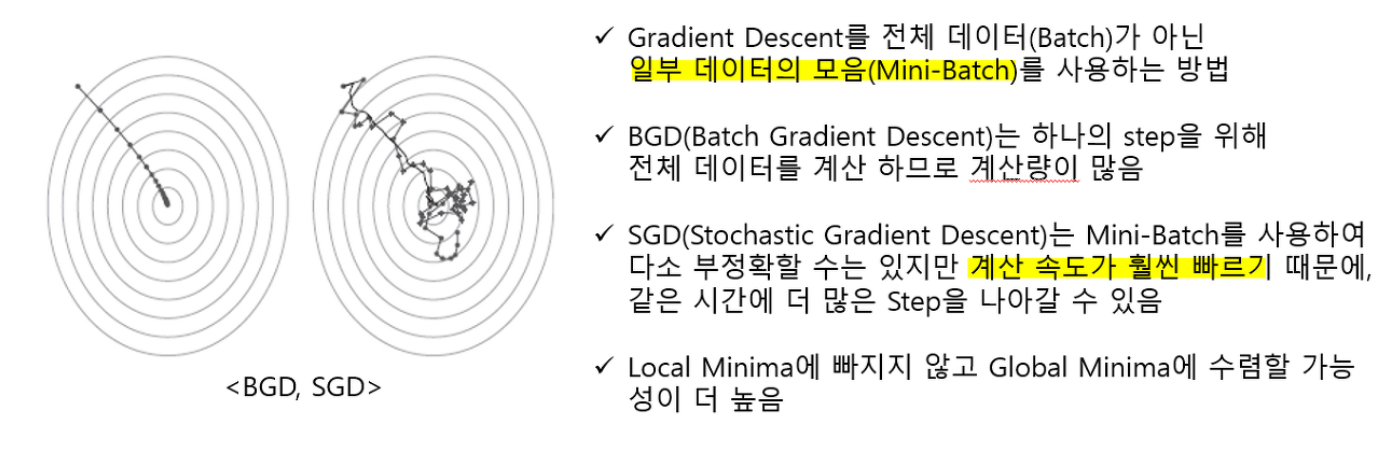

**로지스틱 손실 함수**<p>
각 샘플에 대해 -log(예측이 맞았을 확률) <p>
ex: 정답이 1이고, 예측값이 0.9였을 경우 -log(0.9)<p>
정답이 0이고, 예측값이 0.9였을 경우 -log(0.1)<p>


In [ ]:
sc = SGDClassifier(loss='log_loss',max_iter=10,random_state=42) #loss: 손실 함수의 종류, max_iter: 에포크 횟수
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target) #호출할 때마다 1 에포크씩 이어서 훈련
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


과소적합 - 적정 - 과대적합: 에포크 횟수에 따라 결정<p>
조기 종료: 과대적합이 시작되기 전에 훈련을 멈추는 것

In [ ]:
sc = SGDClassifier(loss='log_loss',random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

In [ ]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 자동으로 멈춤

In [ ]:
sc = SGDClassifier(loss = 'log_loss', max_iter=100, tol=None, random_state=42) #tol: None이 아닐 때, 손실이 tol만큼 줄어들지 않으면 자동으로 멈춤 / 기본값: 1e-3
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


힌지 손실: SGDClassifier의 기본 손실 함수

In [ ]:
sc = SGDClassifier(loss = 'hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
